X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

There are quite a few goals for this case study.

1. Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. 
2. There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well.

# Step 1: Reading and Understanding the Data


In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# import the data
leads_data = pd.read_csv('Leads.csv')
#leads_data = pd.read_csv('Leads.csv',na_values = 'Select')

In [3]:
# Check the head of the dataset
leads_data.head()

Prospect ID  Lead Number              Lead Origin  \
0  7927b2df-8bba-4d29-b9a2-b6e0beafe620       660737                      API   
1  2a272436-5132-4136-86fa-dcc88c88f482       660728                      API   
2  8cc8c611-a219-4f35-ad23-fdfd2656bd8a       660727  Landing Page Submission   
3  0cc2df48-7cf4-4e39-9de9-19797f9b38cc       660719  Landing Page Submission   
4  3256f628-e534-4826-9d63-4a8b88782852       660681  Landing Page Submission   

      Lead Source Do Not Email Do Not Call  Converted  TotalVisits  \
0      Olark Chat           No          No          0          0.0   
1  Organic Search           No          No          0          5.0   
2  Direct Traffic           No          No          1          2.0   
3  Direct Traffic           No          No          0          1.0   
4          Google           No          No          1          2.0   

   Total Time Spent on Website  Page Views Per Visit  ...  \
0                            0                   0.0  ...   
1                          674                   2.5  ...   
2                         1532                   2.0  ...   
3                          305                   1.0  ...   
4                         1428                   1.0  ...   

  Get updates on DM Content    Lead Profile    City  \
0                        No          Select  Select   
1                        No          Select  Select   
2                        No  Potential Lead  Mumbai   
3                        No          Select  Mumbai   
4                        No          Select  Mumbai   

  Asymmetrique Activity Index Asymmetrique Profile Index  \
0                   02.Medium                  02.Medium   
1                   02.Medium                  02.Medium   
2                   02.Medium                    01.High   
3                   02.Medium                    01.High   
4                   02.Medium                    01.High   

  Asymmetrique Activity Score Asymmetrique Profile Score  \
0                        15.0                       15.0   
1                        15.0                       15.0   
2                        14.0                       20.0   
3                        13.0                       17.0   
4                        15.0                       18.0   

  I agree to pay the amount through cheque  \
0                                       No   
1                                       No   
2                                       No   
3                                       No   
4                                       No   

  A free copy of Mastering The Interview Last Notable Activity  
0                                     No              Modified  
1                                     No          Email Opened  
2                                    Yes          Email Opened  
3                                     No              Modified  
4                                     No              Modified  

[5 rows x 37 columns]

In [4]:
# Check the columns
leads_data.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [5]:
# Inspect rows and columns
leads_data.shape

(9240, 37)

In [6]:
#Inspect numeric values
leads_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

# Step 2: Cleaning the Data


In [7]:
# Converting columns with select data to NAN
leads_data = leads_data.replace('Select',np.nan)

In [8]:
# Check for Unique Values
leads_data.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [9]:
# Dropping unique valued columns
leads_data= leads_data.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)


In [10]:
leads_data.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Newspaper Article                                   2
X Education Forums          

In [11]:
# Check for Null Value
leads_data.isnull().sum()


Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums          

In [12]:
# Checking missing values percentage
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)


Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [13]:
# Dropping columns with null value more than 35%
leads_data = leads_data.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Lead Number'],axis=1)


In [14]:
# Checking missing values percentage
leads_data.isnull().sum()

Prospect ID                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement       

In [15]:
# Convert the high NULL values with 'No Data'
leads_data['Specialization'] = leads_data['Specialization'].fillna('No Data') 
leads_data['What matters most to you in choosing a course'] = leads_data['What matters most to you in choosing a course'].fillna('No Data')
leads_data['Country'] = leads_data['Country'].fillna('No Data')
leads_data['What is your current occupation'] = leads_data['What is your current occupation'].fillna('No Data')
leads_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [16]:
# Checking missing values percentage
round(100*(leads_data.isnull().sum()/len(leads_data.index)), 2)


Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [17]:
leads_data.isnull().sum()

Prospect ID                                        0
Lead Origin                                        0
Lead Source                                       36
Do Not Email                                       0
Do Not Call                                        0
Converted                                          0
TotalVisits                                      137
Total Time Spent on Website                        0
Page Views Per Visit                             137
Last Activity                                    103
Country                                            0
Specialization                                     0
What is your current occupation                    0
What matters most to you in choosing a course      0
Search                                             0
Newspaper Article                                  0
X Education Forums                                 0
Newspaper                                          0
Digital Advertisement                         

In [18]:
# Analyzing numerical non null value
# Plotting count plot of 'TotalVisits' to see the data distribution:-

plt.figure(figsize=(15,5))
sns.countplot(leads_data['TotalVisits'])
plt.xticks(rotation=90)
plt.show()



In [19]:
# Computing missing value with 'median' value for  'TotalVisits' column
leads_data['TotalVisits'].fillna(leads_data['TotalVisits'].median(), inplace=True)


In [20]:
# Check if Totalvisits has null value
leads_data['TotalVisits'].isnull().sum()

0

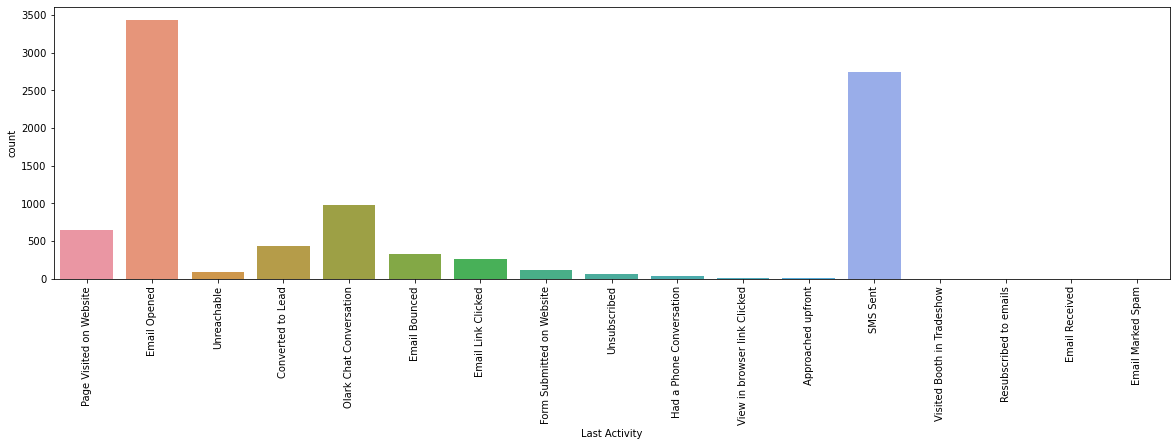

In [21]:
# Plotting count plot of 'Last Activity' to see the data distribution:-

plt.figure(figsize=(20,5))
sns.countplot(leads_data['Last Activity'])
plt.xticks(rotation=90)
plt.show()

In [22]:
# Checking value counts of 'Last Activity':-

leads_data['Last Activity'].value_counts()




Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Resubscribed to emails             1
Visited Booth in Tradeshow         1
Name: Last Activity, dtype: int64

In [23]:
#  Compute missing value with 'Email Opened',the most frequent value
leads_data['Last Activity'] = leads_data['Last Activity'].replace(np.nan, 'Email Opened')


In [24]:
leads_data['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Social Media            2
Live Chat               2
Press_Release           2
youtubechannel          1
WeLearn                 1
blog                    1
NC_EDM                  1
Pay per Click Ads       1
welearnblog_Home        1
testone                 1
Name: Lead Source, dtype: int64

In [25]:
# Replace 'google' with 'Google' 
leads_data['Lead Source']=leads_data['Lead Source'].replace('google','Google')

In [26]:
# Computing rest of missing values with Google
leads_data['Lead Source'].fillna('Google',inplace=True)

In [27]:
leads_data['TotalVisits'].isnull().sum()

0

In [28]:
# Plotting count plot of 'Page Views Per Visit' to see the data distribution:-

plt.figure(figsize=(20,5))
sns.countplot(leads_data['Page Views Per Visit'])
plt.xticks(rotation=90)
plt.show()

In [29]:
# Computing missing value with 'median' value for'Page Views Per Visit' column
leads_data['Page Views Per Visit'].fillna(leads_data['Page Views Per Visit'].median(), inplace=True)


In [30]:
# Check if Page Views Per Visit has null value
leads_data['Page Views Per Visit'].isnull().sum()

0

In [31]:
leads_data.isnull().sum()

Prospect ID                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations        

In [32]:
# Analyze all categorical values
for column in leads_data:
    print(leads_data[column].astype('category').value_counts())
    print('----------------------------------------------------------------------------------------')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
----------------------------------------------------------------------------------------
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
----------------------------------------------------------------------------------------
Google               2909
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference         

# Step 3: EDA

In [33]:
#Univariate Analysis: Analysis for categorical columns
leads_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9240 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9240 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9240 non-null   float64
 9   Last Activity                                  9240 

In [34]:
# Analyzing the Lead source and Lead origion
plt.figure(figsize = (15,10))

plt.subplot(1,2,1)
sns.countplot(leads_data['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.subplot(1,2,2)
sns.countplot(leads_data['Lead Origin']).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')
plt.show()

# Insight :  Majority of Leads source are from Olark/organic search/direct traffic/google

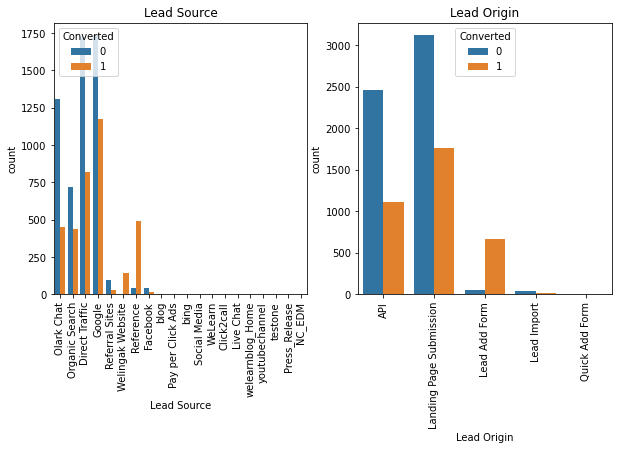

In [35]:
# Convert categorical variables

plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.countplot(x='Lead Source', hue='Converted', data= leads_data).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')

plt.subplot(1,2,2)
sns.countplot(x='Lead Origin', hue='Converted', data= leads_data).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')
plt.show()

#Inference  - Very High lead conversion in Olark chart, direct traffic and google. Similarly high lead conversion with deal origin 


Text(0.5, 1.0, 'Do Not Call')

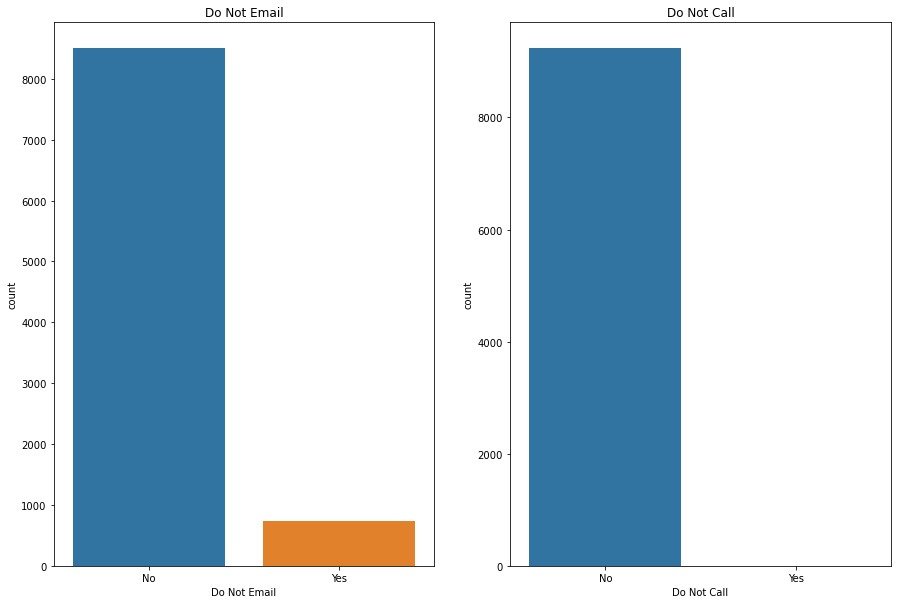

In [36]:
# Analyzing the negative indicators like : Do not call/ do not mail
plt.figure(figsize = (15,10))

plt.subplot(1,2,1)
sns.countplot(leads_data['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(leads_data['Do Not Call'])
plt.title('Do Not Call')

#Inference - The lead receivers didn't opt for do not mail/call options meaning they want companies to call/mail them
# One kind of resoponse is very high. No point in converting categorical variables to Converted

In [37]:
# Analyzing the effectiveness of the sourcing channel

plt.figure(figsize = (15,10))

plt.subplot(2,4,1)
sns.countplot(leads_data['Search'])
plt.title('Search')

plt.subplot(2,4,2)
sns.countplot(leads_data['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(2,4,3)
sns.countplot(leads_data['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(2,4,4)
sns.countplot(leads_data['Newspaper'])
plt.title('Newspaper')

plt.subplot(2,4,5)
sns.countplot(leads_data['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(2,4,6)
sns.countplot(leads_data['Through Recommendations'])
plt.title('Through Recommendations')


#  Ads placed in other medium was NOT EFFECTIVE and not seen by the leads
# One kind of resoponse is very high. No point in converting categorical variables to Converted

Text(0.5, 1.0, 'Through Recommendations')

In [38]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.countplot(leads_data['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.subplot(1,2,2)
sns.countplot(leads_data['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

# Inference : We dont have sufficient data to infer specilization of leads while occupation is unemployed


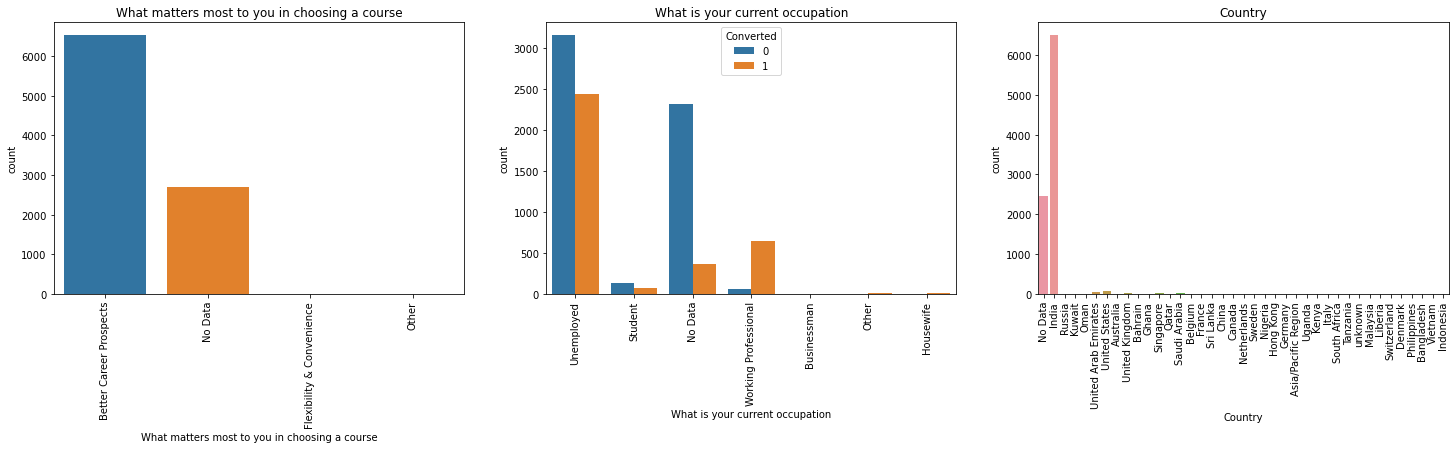

In [39]:
plt.figure(figsize = (25,5))
plt.subplot(1,3,1)
sns.countplot(leads_data['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.subplot(1,3,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= leads_data).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.subplot(1,3,3)
sns.countplot(leads_data['Country']).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()


# Inference : Career aspects is paramount for leads. Most of leads from India
#No requirement to conversion as single category has data


In [40]:
#Analyzing the leads/ notable action / last 

#plt.show()

plt.figure(figsize = (15,5))
plt.subplot(1,3,1)
sns.countplot(leads_data['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.subplot(1,3,2)
sns.countplot(leads_data['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.subplot(1,3,3)
sns.countplot(leads_data['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')
plt.show()

# Inference: Similar trends in both : Leads have opened email and sent sms. Though Company was able to
#spark interest leads didnt want the free copy



In [41]:
# Convert categorical variables
plt.figure(figsize = (20,5))
plt.subplot(1,3,1)
sns.countplot(x='Last Activity', hue='Converted', data= leads_data).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,3,2)
sns.countplot(x='Last Notable Activity', hue='Converted', data= leads_data).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')

plt.subplot(1,3,3)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= leads_data).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')

plt.show()

# Inference:Mail opened/modified has lead to converted to leads but SMS send as an inverse effect on leads

In [42]:
# Analyzing converted vs not converted
leads_data.Converted.value_counts()


0    5679
1    3561
Name: Converted, dtype: int64

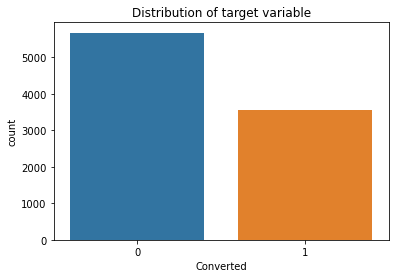

In [43]:
#Analyzing target variables: Distribution of  converted values
sns.countplot(leads_data['Converted'])
plt.title('Distribution of target variable')
plt.show()
# Inference: None

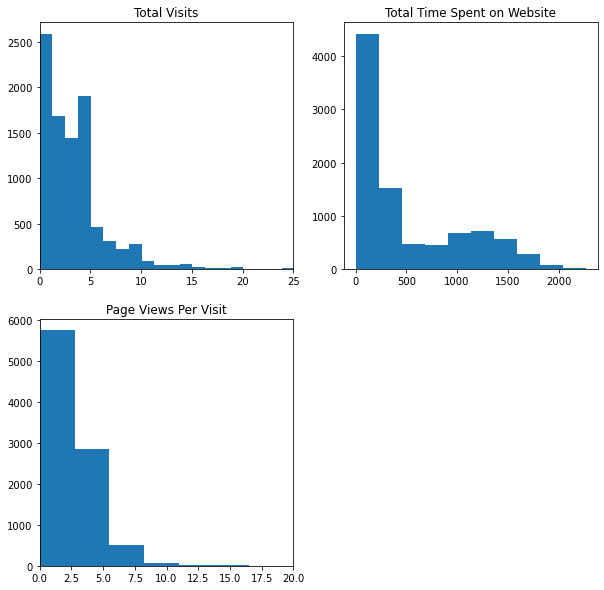

In [44]:
#Univariate Analysis: Analysis for numerical columns
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(leads_data['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(leads_data['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(leads_data['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

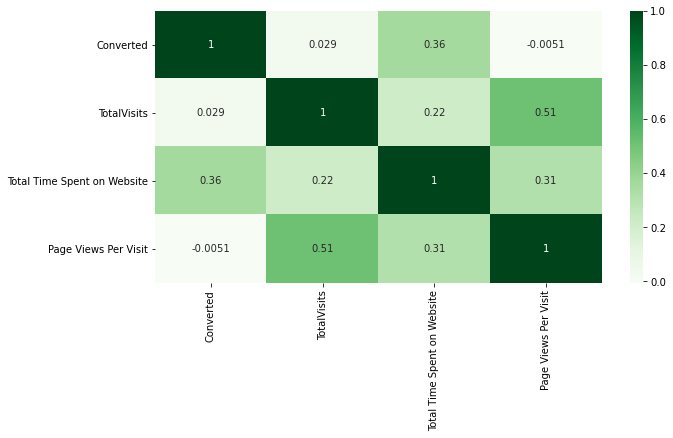

In [45]:
#Bivariate Analysis
# To check the correlation among varibles
plt.figure(figsize=(10,5))
ax = sns.heatmap(leads_data.corr(),annot = True,cmap='Greens')
plt.show()

#Inference: 'TotalVisits' and 'Page Views per Visit' are highly correlated with correlation of .51
# Total Time Spent on Website' has correlation of 0.36 with target variable 'Converted'.

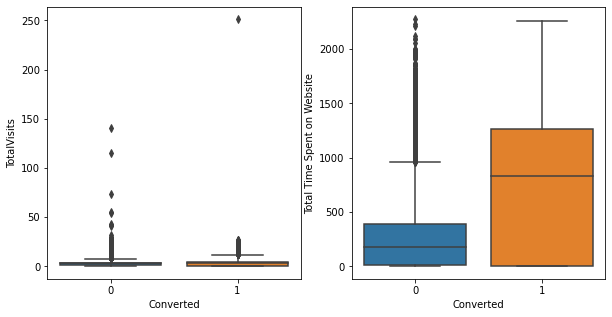

In [46]:
# Plotting box plot to further analyze these correlation
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.boxplot(y = 'TotalVisits', x = 'Converted', data = leads_data)
plt.subplot(1,2,2)
sns.boxplot(x='Converted', y='Total Time Spent on Website',data=leads_data)
plt.show()

#Inference
# Leads who spend more time on website are more likely to not be converted
# No inference between total visits vs converted


In [47]:
leads_data = leads_data.drop(['Prospect ID'],axis=1)
leads_data = leads_data.drop(['Search','Newspaper Article','X Education Forums','Newspaper', 'Digital Advertisement','Through Recommendations'],axis=1)
leads_data = leads_data.drop(['Do Not Call'],axis=1)
leads_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 14 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Converted                                      9240 non-null   int64  
 4   TotalVisits                                    9240 non-null   float64
 5   Total Time Spent on Website                    9240 non-null   int64  
 6   Page Views Per Visit                           9240 non-null   float64
 7   Last Activity                                  9240 non-null   object 
 8   Country                                        9240 non-null   object 
 9   Specialization                                 9240 

# Step 4: Data Preparation

## Creating Dummy Variable


In [48]:

# Finding the categorical variables 
leads_data.loc[:, leads_data.dtypes == 'object'].columns


Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [49]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(leads_data[['Lead Origin', 'Lead Source', 'Do Not Email','Last Activity', 'Country', 'Specialization',
'What is your current occupation','What matters most to you in choosing a course','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
leads_data_dum = pd.concat([leads_data, dummy], axis=1)
leads_data_dum

Lead Origin     Lead Source Do Not Email  Converted  \
0                         API      Olark Chat           No          0   
1                         API  Organic Search           No          0   
2     Landing Page Submission  Direct Traffic           No          1   
3     Landing Page Submission  Direct Traffic           No          0   
4     Landing Page Submission          Google           No          1   
...                       ...             ...          ...        ...   
9235  Landing Page Submission  Direct Traffic          Yes          1   
9236  Landing Page Submission  Direct Traffic           No          0   
9237  Landing Page Submission  Direct Traffic          Yes          0   
9238  Landing Page Submission          Google           No          1   
9239  Landing Page Submission  Direct Traffic           No          1   

      TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
0             0.0                            0                  0.00   
1             5.0                          674                  2.50   
2             2.0                         1532                  2.00   
3             1.0                          305                  1.00   
4             2.0                         1428                  1.00   
...           ...                          ...                   ...   
9235          8.0                         1845                  2.67   
9236          2.0                          238                  2.00   
9237          2.0                          199                  2.00   
9238          3.0                          499                  3.00   
9239          6.0                         1279                  3.00   

                Last Activity       Country             Specialization  ...  \
0     Page Visited on Website       No Data                    No Data  ...   
1                Email Opened         India                    No Data  ...   
2                Email Opened         India    Business Administration  ...   
3                 Unreachable         India      Media and Advertising  ...   
4           Converted to Lead         India                    No Data  ...   
...                       ...           ...                        ...  ...   
9235        Email Marked Spam  Saudi Arabia     IT Projects Management  ...   
9236                 SMS Sent         India      Media and Advertising  ...   
9237                 SMS Sent         India    Business Administration  ...   
9238                 SMS Sent         India  Human Resource Management  ...   
9239                 SMS Sent    Bangladesh    Supply Chain Management  ...   

     Last Notable Activity_Form Submitted on Website  \
0                                                  0   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   
...                                              ...   
9235                                               0   
9236                                               0   
9237                                               0   
9238                                               0   
9239                                               0   

     Last Notable Activity_Had a Phone Conversation  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                 0   
4                                                 0   
...                                             ...   
9235                                              0   
9236                                              0   
9237                                              0   
9238                                              0   
9239                                             

In [50]:
leads_data_dum = leads_data_dum.drop(['Lead Origin', 'Lead Source', 'Do Not Email','Last Activity', 'Country', 'Specialization',
'What is your current occupation','What matters most to you in choosing a course','A free copy of Mastering The Interview', 'Last Notable Activity'], axis=1)
leads_data_dum

Converted  TotalVisits  Total Time Spent on Website  \
0             0          0.0                            0   
1             0          5.0                          674   
2             1          2.0                         1532   
3             0          1.0                          305   
4             1          2.0                         1428   
...         ...          ...                          ...   
9235          1          8.0                         1845   
9236          0          2.0                          238   
9237          0          2.0                          199   
9238          1          3.0                          499   
9239          1          6.0                         1279   

      Page Views Per Visit  Lead Origin_Landing Page Submission  \
0                     0.00                                    0   
1                     2.50                                    0   
2                     2.00                                    1   
3                     1.00                                    1   
4                     1.00                                    1   
...                    ...                                  ...   
9235                  2.67                                    1   
9236                  2.00                                    1   
9237                  2.00                                    1   
9238                  3.00                                    1   
9239                  3.00                                    1   

      Lead Origin_Lead Add Form  Lead Origin_Lead Import  \
0                             0                        0   
1                             0                        0   
2                             0                        0   
3                             0                        0   
4                             0                        0   
...                         ...                      ...   
9235                          0                        0   
9236                          0                        0   
9237                          0                        0   
9238                          0                        0   
9239                          0                        0   

      Lead Origin_Quick Add Form  Lead Source_Direct Traffic  \
0                              0                           0   
1                              0                           0   
2                              0                           1   
3                              0                           1   
4                              0                           0   
...                          ...                         ...   
9235                           0                           1   
9236                           0                           1   
9237                           0                           1   
9238                           0                           0   
9239                           0                           1   

      Lead Source_Facebook  ...  \
0                        0  ...   
1                        0  ...   
2                        0  ...   
3                        0  ...   
4                        0  ...   
...                    ...  ...   
9235                     0  ...   
9236                     0  ...   
9237                     0  ...   
9238                     0  ...   
9239                     0  ...   

      Last Notable Activity_Form Submitted on Website  \
0                                                   0   
1                                                   0   
2                                                   0   
3                                                   0   
4                                                   0   
...                                               ...   
9235                                                0   
9236                                                0   
9237                                        

In [51]:
leads_data_dum = leads_data_dum.reset_index()


# Step 5:  Test Train Split

In [52]:
# Import the Packages to split data
from sklearn.model_selection import train_test_split

In [53]:
# Dropping Target variable from predicter values
X = leads_data_dum.drop(['Converted'], axis=1)


In [54]:
# Assigning Target variable to y axis
y = leads_data_dum['Converted']


In [55]:
# Splitting the data into train and test of 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)


In [56]:
# Check the shape of 'X_train' dataset after splitting:-
X_train.shape


(6468, 125)

In [57]:
# Check the shape of 'X_test' dataset after splitting:-
X_test.shape


(2772, 125)

# Step 6: Feature Scaling


In [58]:
#Importing Scaling library 
from sklearn.preprocessing import MinMaxScaler


In [59]:
# Scale the three numeric features
scaler = MinMaxScaler()
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

index  TotalVisits  Total Time Spent on Website  Page Views Per Visit  \
3112   3112     0.007968                     0.182867              0.083333   
8413   8413     0.019920                     0.679538              0.208333   
2961   2961     0.011952                     0.553928              0.041667   
24       24     0.023904                     0.504660              0.062500   
2740   2740     0.011952                     0.445184              0.125000   

      Lead Origin_Landing Page Submission  Lead Origin_Lead Add Form  \
3112                                    1                          0   
8413                                    1                          0   
2961                                    0                          1   
24                                      0                          0   
2740                                    1                          0   

      Lead Origin_Lead Import  Lead Origin_Quick Add Form  \
3112                        0                           0   
8413                        0                           0   
2961                        0                           0   
24                          0                           0   
2740                        0                           0   

      Lead Source_Direct Traffic  Lead Source_Facebook  ...  \
3112                           1                     0  ...   
8413                           0                     0  ...   
2961                           0                     0  ...   
24                             0                     0  ...   
2740                           0                     0  ...   

      Last Notable Activity_Form Submitted on Website  \
3112                                                0   
8413                                                0   
2961                                                0   
24                                                  0   
2740                                                0   

      Last Notable Activity_Had a Phone Conversation  \
3112                                               0   
8413                                               0   
2961                                               0   
24                                                 0   
2740                                               0   

      Last Notable Activity_Modified  \
3112                               0   
8413                               0   
2961                               0   
24                                 0   
2740                               0   

      Last Notable Activity_Olark Chat Conversation  \
3112                                              0   
8413                                              0   
2961                                              0   
24                                                0   
2740                                              0   

      Last Notable Activity_Page Visited on Website  \
3112                                              0   
8413                                              0   
2961                                              0   
24                                                0   
2740                                              0   

      Last Notable Activity_Resubscribed to emails  \
3112                                             0   
8413                                             0   
2961                                             0   
24                                               0   
2740                                             0   

      Last Notable Activity_SMS Sent  Last Notable Activity_Unreachable  \
3112                               0                                  0   
8413                               1                                  0   
2961                               0                                  0   
24                                 0                                  0   
2740                               0                                 

In [60]:
X_train.isnull().sum()


index                                                 0
TotalVisits                                           0
Total Time Spent on Website                           0
Page Views Per Visit                                  0
Lead Origin_Landing Page Submission                   0
                                                     ..
Last Notable Activity_Resubscribed to emails          0
Last Notable Activity_SMS Sent                        0
Last Notable Activity_Unreachable                     0
Last Notable Activity_Unsubscribed                    0
Last Notable Activity_View in browser link Clicked    0
Length: 125, dtype: int64

# Step 7:  Model Building


In [85]:
#Importing 'LogisticRegression' :-
from sklearn.linear_model import LogisticRegression
# Creating LogisticRegression Object called 'regressor':-
regressor = LogisticRegression()

In [86]:
#Importing 'RFE' for feature selection:-
from sklearn.feature_selection import RFE
 # running RFE with 15 variables as output
rfe = RFE(regressor,15)            
rfe = rfe.fit(X_train, y_train)

In [87]:
#Displaying the columns selected by RFE and their weights:-
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('index', False, 104),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 5),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Origin_Quick Add Form', False, 106),
 ('Lead Source_Direct Traffic', False, 47),
 ('Lead Source_Facebook', False, 25),
 ('Lead Source_Google', False, 100),
 ('Lead Source_Live Chat', False, 72),
 ('Lead Source_NC_EDM', False, 11),
 ('Lead Source_Olark Chat', False, 68),
 ('Lead Source_Organic Search', False, 54),
 ('Lead Source_Pay per Click Ads', False, 59),
 ('Lead Source_Press_Release', False, 92),
 ('Lead Source_Reference', False, 43),
 ('Lead Source_Referral Sites', False, 51),
 ('Lead Source_Social Media', False, 30),
 ('Lead Source_WeLearn', False, 41),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 40),
 ('Lead Source_blog', False, 69),
 ('Lead Source_testone', False, 57),
 ('Lead Source

In [88]:
# Storing columns selected by RFE into 'col' and displaying it:-

col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Welingak Website',
       'Do Not Email_Yes', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent', 'Country_No Data',
       'What is your current occupation_Housewife',
       'What is your current occupation_Working Professional',
       'What matters most to you in choosing a course_No Data',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [89]:
# Selecting the columns selected by RFE
X_train_rfe = X_train[col]


In [90]:
#Analyzing the Linear  Regression Model: Importing stats model
import statsmodels.api as sm


# Model 1


In [91]:
#Adding the constant variable
X_train_sm = sm.add_constant(X_train_rfe)
# Fitting model 1:
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial()).fit()
# Displaying the summary
logm1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2634.2
Date:                Tue, 08 Feb 2022   Deviance:                       5268.4
Time:                        19:07:22   Pearson chi2:                 6.87e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -1.9695      0.100    -19.610      0.000      -2.166      -1.773
TotalVisits                                               6.9689      2.115      3.295      0.001       2.823      11.114
Total Time Spent on Website                               4.5490      0.166     27.402      0.000       4.224       4.874
Lead Origin_Landing Page Submission                      -0.4042      0.087     -4.652      0.000      -0.574      -0.234
Lead Origin_Lead Add Form                                 2.2125      0.205     10.799      0.000       1.811       2.614
Lead Origin_Lead Import                                  -1.3724      0.475     -2.892      0.004      -2.303      -0.442
Lead Source_Welingak Website                              2.4389      1.028      2.372      0.018       0.423       4.454
Do Not Email_Yes                                         -1.5113      0.168     -9.011      0.000      -1.840      -1.183
Last Activity_Olark Chat Conversation                    -1.2006      0.160     -7.519      0.000      -1.514      -0.888
Last Activity_SMS Sent                                    1.3634      0.075     18.234      0.000       1.217       1.510
Country_No Data                                           1.1643      0.122      9.541      0.000       0.925       1.404
What is your current occupation_Housewife                21.3738   1.15e+04      0.002      0.999   -2.25e+04    2.26e+04
What is your current occupation_Working Professional      2.5246      0.184     13.701      0.000       2.163       2.886
What matters most to you in choosing a course_No Data    -1.3114      0.088    -14.972      0.000      -1.483      -1.140
Last Notable Activity_Had a Phone Conversation            3.3429      1.177      2.839      0.005       1.035       5.651
Last Notable Activity_Unreachable                         2.6309      0.701      3.753      0.000       1.257       4.005
=========================================================================================================================
"""

In [92]:
# Importing 'variance_inflation_factor'
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [93]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                 Lead Origin_Landing Page Submission  2.20
9                                     Country_No Data  2.20
3                           Lead Origin_Lead Add Form  1.89
1                         Total Time Spent on Website  1.88
0                                         TotalVisits  1.57
8                              Last Activity_SMS Sent  1.48
12  What matters most to you in choosing a course_...  1.47
7               Last Activity_Olark Chat Conversation  1.40
5                        Lead Source_Welingak Website  1.24
11  What is your current occupation_Working Profes...  1.20
6                                    Do Not Email_Yes  1.10
4                             Lead Origin_Lead Import  1.04
10          What is your current occupation_Housewife  1.01
13     Last Notable Activity_Had a Phone Conversation  1.00
14                  Last Notable Activity_Unreachable  1.00

In [94]:
# Inference:  Dropping 'What is your current occupation_Housewife' because of insignificant variable p-value=0.999(p>0.05):-
X_train_new = X_train_rfe.drop(["What is your current occupation_Housewife"], axis = 1)


# Model 2


In [95]:
# Refit the model with the new set of features
# Add constant:-
X_train_sm2 = sm.add_constant(X_train_new)
# Building second fitted model
logm2 = sm.GLM(y_train,X_train_sm2, family = sm.families.Binomial()).fit()
# Displaying the summary
logm2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2637.3
Date:                Tue, 08 Feb 2022   Deviance:                       5274.6
Time:                        19:08:55   Pearson chi2:                 6.89e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
const                                                    -1.9640      0.100    -19.590      0.000      -2.161      -1.768
TotalVisits                                               6.9016      2.110      3.270      0.001       2.765      11.038
Total Time Spent on Website                               4.5464      0.166     27.404      0.000       4.221       4.872
Lead Origin_Landing Page Submission                      -0.4025      0.087     -4.636      0.000      -0.573      -0.232
Lead Origin_Lead Add Form                                 2.2366      0.204     10.937      0.000       1.836       2.637
Lead Origin_Lead Import                                  -1.3704      0.474     -2.888      0.004      -2.300      -0.440
Lead Source_Welingak Website                              2.4170      1.028      2.351      0.019       0.402       4.432
Do Not Email_Yes                                         -1.5147      0.168     -9.028      0.000      -1.844      -1.186
Last Activity_Olark Chat Conversation                    -1.2014      0.160     -7.524      0.000      -1.514      -0.888
Last Activity_SMS Sent                                    1.3593      0.075     18.188      0.000       1.213       1.506
Country_No Data                                           1.1586      0.122      9.513      0.000       0.920       1.397
What is your current occupation_Working Professional      2.5205      0.184     13.680      0.000       2.159       2.882
What matters most to you in choosing a course_No Data    -1.3127      0.088    -14.992      0.000      -1.484      -1.141
Last Notable Activity_Had a Phone Conversation            3.3380      1.177      2.835      0.005       1.030       5.646
Last Notable Activity_Unreachable                         2.6266      0.701      3.746      0.000       1.252       4.001
=========================================================================================================================
"""

In [97]:
# Calculating VIF for new model:-
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
2                 Lead Origin_Landing Page Submission  2.20
9                                     Country_No Data  2.20
1                         Total Time Spent on Website  1.88
3                           Lead Origin_Lead Add Form  1.88
0                                         TotalVisits  1.57
8                              Last Activity_SMS Sent  1.48
11  What matters most to you in choosing a course_...  1.47
7               Last Activity_Olark Chat Conversation  1.40
5                        Lead Source_Welingak Website  1.24
10  What is your current occupation_Working Profes...  1.20
6                                    Do Not Email_Yes  1.10
4                             Lead Origin_Lead Import  1.04
12     Last Notable Activity_Had a Phone Conversation  1.00
13                  Last Notable Activity_Unreachable  1.00

#Inference
From model 'logm2'  P-values of variables are significant and
VIF values are below 3 . 
So we need not drop any more variables and we can proceed with making predictions using this model only considering model 'logm3' as final model.



##  Prediction on Train Dataset


In [143]:
# Predicting the probabilities on the train set
y_train_pred = logm2.predict(X_train_sm2)
# Displaying 10 values
y_train_pred[:10] 

3112    0.185410
8413    0.902010
2961    0.946517
24      0.621368
2740    0.435359
489     0.118493
9116    0.635043
4176    0.218396
8537    0.647129
6267    0.124137
dtype: float64

In [144]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.18541007, 0.90200987, 0.94651653, 0.621368  , 0.43535877,
       0.11849289, 0.63504279, 0.21839566, 0.64712939, 0.12413739])

In [145]:
# Creating Data frame with given 'y_train_pred_final' with actual and predicted values
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})


In [146]:
# Adding column 'Prospect ID' for indexing
y_train_pred_final['Prospect ID'] = y_train.index

In [147]:
# Displaying head of created dataframe
y_train_pred_final.head()


Converted  Converted_Prob  Prospect ID
0          0        0.185410         3112
1          1        0.902010         8413
2          1        0.946517         2961
3          1        0.621368           24
4          0        0.435359         2740

# Step 8: Finding Optimal Cutoff Point


In [148]:
# Creating columns with different probability cutoffs :-
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Converted  Converted_Prob  Prospect ID  0.0  0.1  0.2  0.3  0.4  0.5  0.6  \
0          0        0.185410         3112    1    1    0    0    0    0    0   
1          1        0.902010         8413    1    1    1    1    1    1    1   
2          1        0.946517         2961    1    1    1    1    1    1    1   
3          1        0.621368           24    1    1    1    1    1    1    1   
4          0        0.435359         2740    1    1    1    1    1    0    0   

   0.7  0.8  0.9  
0    0    0    0  
1    1    1    1  
2    1    1    1  
3    0    0    0  
4    0    0    0

In [149]:
#Importing 'metrics' library:-

from sklearn import metrics

# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.388683  1.000000  0.000000
0.1   0.1  0.588435  0.985282  0.336115
0.2   0.2  0.766079  0.919252  0.668690
0.3   0.3  0.792362  0.877884  0.737987
0.4   0.4  0.813080  0.773667  0.838139
0.5   0.5  0.813234  0.705251  0.881892
0.6   0.6  0.806277  0.638425  0.912999
0.7   0.7  0.782004  0.525457  0.945119
0.8   0.8  0.760049  0.435959  0.966110
0.9   0.9  0.716141  0.288783  0.987860


In [150]:
# Plotting accuracy, sensitivity and specificity for various probabilities:-

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0,1,step=0.05),size=8)
plt.axvline(x=0.358, color='r', linestyle='--') # additing axline

plt.show()

# Inference: 0.358 is optimal cutoff point for our model

In [151]:
# Dropping  unnecessary columns 
y_train_pred_final.drop([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],axis = 1, inplace = True) 
y_train_pred_final.head() 


Converted  Converted_Prob  Prospect ID
0          0        0.185410         3112
1          1        0.902010         8413
2          1        0.946517         2961
3          1        0.621368           24
4          0        0.435359         2740

In [152]:
# Assigning  'Lead_Score' based on 'Converted_Prob' :-
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_Prob.map( lambda x: round(x*100))

In [153]:
# Calculating 'final_predicted' based on 'Converted_Prob' using 0.358 cutoff point:-

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.358 else 0)

In [154]:
# Selecting only important columns and displaying head of dataframe:-
y_train_pred_final[['Converted','Converted_Prob','Prospect ID','final_predicted','Lead_Score']].head()

Converted  Converted_Prob  Prospect ID  final_predicted  Lead_Score
0          0        0.185410         3112                0          19
1          1        0.902010         8413                1          90
2          1        0.946517         2961                1          95
3          1        0.621368           24                1          62
4          0        0.435359         2740                1          44

# Step 9: Model Evaluation

In [155]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics



In [156]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
print(confusion)

[[3208  746]
 [ 508 2006]]


In [157]:
#Importing library to plot confusion matrix:-
from sklearn.metrics import plot_confusion_matrix



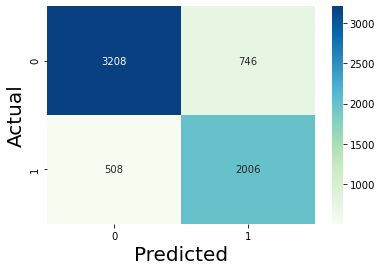

In [158]:
# Plotting confusion matrix:-
sns.heatmap(confusion, annot=True,fmt='g',cmap='GnBu')
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show()

In [159]:
# Actual/Predicted     not_converted   converted
        # not_converted        3194          760
        # converted            511          2003 

In [160]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)
# Model has around 80% accuracy 



0.8061224489795918

In [161]:
# Substituting the value of true positive
TP = confusion[1,1] 
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1]
# Substituting the value of false negatives
FN = confusion[1,0] # false negatives

In [162]:
# Calculating the sensitivity
TP/(TP+FN)

0.7979315831344471

In [163]:
# Calculating specificity:-
TN / float(TN+FP)

0.8113302984319676

In [164]:
# Calculate False Postive Rate 
print(FP/ float(TN+FP))

0.18866970156803237


In [165]:
# Calculate positive predictive value
print (TP / float(TP+FP))

0.7289244186046512


In [166]:
# Calculate Negative predictive value
print (TN / float(TN+ FN))

0.8632938643702907


In [167]:
#Calculate Precision value
confusion[1,1]/(confusion[0,1]+confusion[1,1])


0.7289244186046512

In [168]:
#Calculate Recall value
confusion[1,1]/(confusion[1,0]+confusion[1,1])


0.7979315831344471

In [170]:
#Importing 'precision_score' and 'recall_score':_
from sklearn.metrics import precision_score, recall_score

In [171]:
# Calculating Precision value:-
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7289244186046512

In [172]:
#Calculating Recall value:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7979315831344471

In [232]:
hot_leads=y_pred_final.loc[y_pred_final["Lead_Score"]>=85]
hot_leads

Converted  Prospect ID  Converted_Prob  Lead_Score  final_Predicted
33            1         1561            0.98          98                1
37            1         3727            0.94          94                1
46            1         6422            0.99          99                1
85            1         4844            0.88          88                1
88            1         2722            0.85          85                1
...         ...          ...             ...         ...              ...
2692          1         1467            0.86          86                1
2702          1         8267            0.85          85                1
2723          1         8055            1.00         100                1
2748          1         1542            0.91          91                1
2765          1         6932            0.98          98                1

[215 rows x 5 columns]

There are 215 hot leads which can be contacted and have a high chance of getting converted.

Observation: of the Training Datasey
Accuracy : 80%
Sensitivity : 79%
Specificity : 81%
Pricision: 72%
Recall: 79%


# Step 10: Plotting the ROC Curve

In [173]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [174]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )


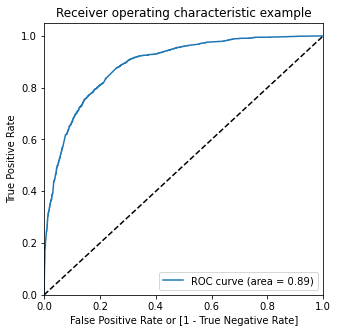

In [175]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)
# Inference: The area under ROC curve is 0.89 which is a very good value

In [176]:
#Precision and recall tradeoff
# Importing required library for 'precision_recall_curve' :-
from sklearn.metrics import precision_recall_curve

In [177]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)


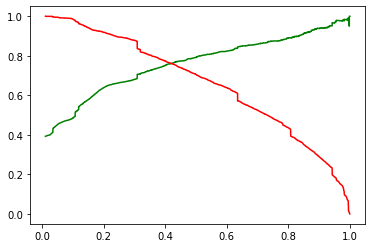

In [182]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()
# Inference:  cutoff point is 0.427.

In [183]:
# plotting the Train dataset again with 0.430 as cutoff:-
y_train_pred_final['final_predicted_2'] = y_train_pred_final['Converted_Prob'].map( lambda x: 1 if x > 0.427 else 0)
y_train_pred_final.head() # Displaying head 

Converted  Converted_Prob  Prospect ID  Lead_Score  final_predicted  \
0          0        0.185410         3112          19                0   
1          1        0.902010         8413          90                1   
2          1        0.946517         2961          95                1   
3          1        0.621368           24          62                1   
4          0        0.435359         2740          44                1   

   final_predicted_2  
0                  0  
1                  1  
2                  1  
3                  1  
4                  1

In [184]:
# Confusion matrix
confusion_2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted_2)
print(confusion_2)

[[3369  585]
 [ 611 1903]]


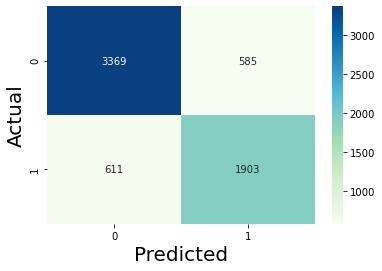

In [185]:
# Plotting confusion matrix
sns.heatmap(confusion_2, annot=True,fmt='g',cmap='GnBu')
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show()

In [186]:
# Check for Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted_2)

0.8150896722325294

In [187]:
TP = confusion_2[1,1] # true positive 
TN = confusion_2[0,0] # true negatives
FP = confusion_2[0,1] # false positives
FN = confusion_2[1,0] # false negatives

In [188]:
# Checking the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7569610182975338

In [189]:
# Calculating specificity value
TN / float(TN+FP)

0.8520485584218513

In [190]:
# Calculate positive predictive value 
print (TP / float(TP+FP))

0.764871382636656


In [194]:
# Calculate Negative predictive value:-
print (TN / float(TN+ FN))

0.8464824120603015


In [192]:
# Calculate Precision value
confusion_2[1,1]/(confusion_2[0,1]+confusion_2[1,1])

0.764871382636656

In [193]:
# Calculating 'Recall' value
confusion_2[1,1]/(confusion_2[1,0]+confusion_2[1,1])

0.7569610182975338

The goal of getting a ballpark is achieved and the 
target lead score of  around 80% .
 The Model seems to predict the Conversion Rate very well 
and we should be able to give the CEO confidence in making
 good calls based on this model to get a higher lead conversion rate of 80%.%.

# Step 11: Making predictions on the test set

In [196]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])


In [197]:
# Predicting using values used by the final model i.e. logm2
test_col = X_train_sm2.columns
X_test=X_test[test_col[1:]]


In [199]:
# Adding constant variable to test dataframe:-
X_test = sm.add_constant(X_test)

X_test.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2772 entries, 567 to 924
Data columns (total 15 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   const                                                  2772 non-null   float64
 1   TotalVisits                                            2772 non-null   float64
 2   Total Time Spent on Website                            2772 non-null   float64
 3   Lead Origin_Landing Page Submission                    2772 non-null   uint8  
 4   Lead Origin_Lead Add Form                              2772 non-null   uint8  
 5   Lead Origin_Lead Import                                2772 non-null   uint8  
 6   Lead Source_Welingak Website                           2772 non-null   uint8  
 7   Do Not Email_Yes                                       2772 non-null   uint8  
 8   Last Activity_Olark Chat Conversation          

In [200]:
#Making Predictions on the X_test dataset using the final model
y_test_pred = logm2.predict(X_test)


In [201]:
y_test_pred[:10]


567     0.094721
2303    0.135161
1523    0.179168
6923    0.090710
7841    0.105682
3036    0.371045
2427    0.825133
8667    0.126627
3245    0.030224
1805    0.292041
dtype: float64

In [202]:
# Converting y_test_pred to a dataframe 
y_pred_1 = pd.DataFrame(y_test_pred)

In [203]:
y_pred_1.head()


0
567   0.094721
2303  0.135161
1523  0.179168
6923  0.090710
7841  0.105682

In [204]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [205]:
# Adding 'Prospect ID' to index
y_test_df['Prospect ID'] = y_test_df.index

In [206]:
# Removing index for both dataframes to append them side by side :-
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)


In [207]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [208]:
y_pred_final.head()

Converted  Prospect ID         0
0          0          567  0.094721
1          0         2303  0.135161
2          0         1523  0.179168
3          0         6923  0.090710
4          0         7841  0.105682

In [209]:
# Renaming the column '0' as 'Converted_Prob':-
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [210]:
y_pred_final.head()


Converted  Prospect ID  Converted_Prob
0          0          567        0.094721
1          0         2303        0.135161
2          0         1523        0.179168
3          0         6923        0.090710
4          0         7841        0.105682

In [211]:
#Assigning 'Lead Score' to dataframe 'y_pred_final':-
y_pred_final['Lead_Score'] = y_pred_final.Converted_Prob.map( lambda x: round(x*100))


In [212]:
y_pred_final.head()


Converted  Prospect ID  Converted_Prob  Lead_Score
0          0          567        0.094721           9
1          0         2303        0.135161          14
2          0         1523        0.179168          18
3          0         6923        0.090710           9
4          0         7841        0.105682          11

In [213]:
# Calculating 'final_Predicted' based on 'Converted_Prob' for cutoff point 0.357
y_pred_final['final_Predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.357 else 0)

In [214]:
y_pred_final.head()


Converted  Prospect ID  Converted_Prob  Lead_Score  final_Predicted
0          0          567        0.094721           9                0
1          0         2303        0.135161          14                0
2          0         1523        0.179168          18                0
3          0         6923        0.090710           9                0
4          0         7841        0.105682          11                0

In [230]:
#Test model evaluation:Checking the overall accuracy:-
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Predicted)



0.7651515151515151

In [216]:
# Calculating confusion matrix for test data
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Predicted )
confusion2

array([[1628,   97],
       [ 554,  493]], dtype=int64)

In [217]:
# Plotting confusion matrix
sns.heatmap(confusion2, annot=True,fmt='g',cmap='GnBu')
plt.xlabel('Predicted',fontsize=20)
plt.ylabel('Actual',fontsize=20)
plt.show()

In [218]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [219]:
# Calculate sensitivity of our logistic regression model
TP / float(TP+FN)

0.4708691499522445

In [220]:
# Calculate specificity value
TN / float(TN+FP)

0.943768115942029

In [221]:
# Calculate False Postive Rate 
print(FP/ float(TN+FP))

0.05623188405797101


In [222]:
# Calculate positive predictive value 
print (TP / float(TP+FP))

0.8355932203389831


In [223]:
# Calculate Negative predictive value
print (TN / float(TN+ FN))

0.7461044912923923


In [224]:
# Calculating 'precision_score'
precision_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.8355932203389831

In [225]:
#Calculating 'recall_score'
recall_score(y_pred_final.Converted, y_pred_final.final_Predicted)

0.4708691499522445

# Step 11: Determining Top Feature

In [226]:
#Determining top feature based on final model 
pd.options.display.float_format = '{:.2f}'.format 
logm2.params[1:]

TotalVisits                                              6.90
Total Time Spent on Website                              4.55
Lead Origin_Landing Page Submission                     -0.40
Lead Origin_Lead Add Form                                2.24
Lead Origin_Lead Import                                 -1.37
Lead Source_Welingak Website                             2.42
Do Not Email_Yes                                        -1.51
Last Activity_Olark Chat Conversation                   -1.20
Last Activity_SMS Sent                                   1.36
Country_No Data                                          1.16
What is your current occupation_Working Professional     2.52
What matters most to you in choosing a course_No Data   -1.31
Last Notable Activity_Had a Phone Conversation           3.34
Last Notable Activity_Unreachable                        2.63
dtype: float64

In [227]:
# Determining relative coeffient value for all the features wrt the feature with the highest coefficient:-
top_feature = logm2.params[1:]
top_feature = 100.0 * (top_feature / top_feature.max())
top_feature

TotalVisits                                             100.00
Total Time Spent on Website                              65.87
Lead Origin_Landing Page Submission                      -5.83
Lead Origin_Lead Add Form                                32.41
Lead Origin_Lead Import                                 -19.86
Lead Source_Welingak Website                             35.02
Do Not Email_Yes                                        -21.95
Last Activity_Olark Chat Conversation                   -17.41
Last Activity_SMS Sent                                   19.70
Country_No Data                                          16.79
What is your current occupation_Working Professional     36.52
What matters most to you in choosing a course_No Data   -19.02
Last Notable Activity_Had a Phone Conversation           48.37
Last Notable Activity_Unreachable                        38.06
dtype: float64

In [228]:
# Plotting the feature variables based on their relative importance:-
top_feature_sort = np.argsort(top_feature,kind='quicksort',order='list of str')
pos = np.arange(top_feature_sort.shape[0]) + .5
fig1 = plt.figure(figsize=(10,5))
ax = fig1.add_subplot(1, 1, 1)
ax.barh(pos, top_feature[top_feature_sort])
ax.set_yticks(pos)
ax.set_yticklabels(np.array(X_train_new.columns)[top_feature_sort], fontsize=13)
ax.set_xlabel('Top Features', fontsize=15)
plt.show()

In [ ]:
# Step 12: Recommendation

Inference : It was observed that the variables that mattered the most in the potential buyers are :

Hot Leads are
 leads coming from the lead sources "Welingak Websites"
 leads who are the "working professionals" 
 leads who spent "more time on the websites" and "total visits"
 last activity was "Phone conversation" or "SMS Sent"
 
Avoid Leads 

last activity was "Olark Chat Conversation" 
lead origin is "Landing Page Submission" and "Lead Import"
